<a href="https://colab.research.google.com/github/moncykurien/practice_projects/blob/master/PracticeProject_18BigMartProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Training data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Observations:
1. There are categorical variables as well as continuous variables in the dataset.
2. The target variable 'Item_Outlet_Sales' is a continuous variable. So we are looking at solving a regression problem.
3. Item_Visibility shows 0.000000 as a values. We need to understand more about the variable.
4. We can replace the Outlet_Establishment_Year with the Outlet's age as that can give us some insight as to it older outlets have more customers which inturn would reflect in the sales.

Loading the test data

In [3]:
data_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_ts = data_test.copy()
df_ts.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_ts.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Observations:
1. The target variable is missing in the test data. So this data cannot be used for validation. Hence I will be using the training data for training as well as validation.
2. At a glance there are some missing values. Ill be treating the missing values in Train and test data separately to keep them from mixing.
3. Missing values in test data will be imputed based on test dataset data.
4. All the feature engineer/ transformations/ encodings I do for the training data, Ill be doing those for the test data before the test data using the techniques and values used in training phase. This will help me to keep the test data as an unseen data.

https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test#:~:text=3%20Answers&text=You%20should%20split%20before%20pre%2Dprocessing%20or%20imputing.&text=Keeping%20the%20past%2Ffuture%20analogy,on%20the%20training%20set%20alone.

In [5]:
df = data.copy()
print("Training data shape: ",df.shape)
print("Test data shape: ",df_ts.shape)

Training data shape:  (8523, 12)
Test data shape:  (5681, 11)


Observations:
1. There are 8523 rows and 12 columns(11 predictors + 1 target) in train data.
2. There are 5681 rows and 11 Columns(11 predictors) in the test data.

### Train data - Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observations:
1. There are 4 continuous variables.
2. One Integer variable showing the Year which I will be using to find the age of the Outlet.
3. 7 Object type variables
4. There are some missing data in Item_weight and Outlet_Size.

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observations:
1. There are 1463 missing data in Item_Weight and 2410 missing data in Outlet_Size

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Observations:
1. There are 1559 items in the data.
2. There are 16 types of items in the data.
3. There are 10 Outlets in the data.
4. There are 4 types of Outlets.
5. There are 3 outlet sizes.
6. There are 3 types of locations for the OUtlets.

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
1. Item_Weight seem to be close to normal distribution.
2. The min value sin Item_Visibility is 0 which either means that these items are kept hidden from the customers which is highly unlikely or the Item_Visibili values are actually missing. I would assume that these are also missing data. 
3. The Item_Outlet_Sales is ranging from 33.29 to 13086.964.
4. The Item_Outlet_Sales seem to be right skewed.

In [10]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


Observations:
1. Low Fat food items seem to be very popular. The frequency is pretty high.
2. Supermarket Type 1 in Outlet_Type is very popular occuring 5577 times in the data.


In [11]:
for col in cat_cols:
  print(f"Categories count for {col}")
  print(f"{df[col].value_counts()}\n")

Categories count for Item_Identifier
FDG33    10
FDW13    10
NCQ06     9
FDX31     9
FDO19     9
         ..
FDQ60     1
FDT35     1
FDO33     1
FDY43     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Categories count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Categories count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Categories count for Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
O

Observations:
1. Item_Identifier has so many categories. It will make sense to just use the 1st 2 characters in the Item_Identifier to get a consolidated group of the Item Type.
2. There are some wrong values(LF and low fat instead of Low Fat and reg instead of Regular). This needs to be corrected.
3. Item_Type needs more investigation. There are some items in that do not occur as much as the others.
4. Need to investigate Outlet_Type also since there is an imbalance in the data distribution among the categories


### Data Cleaning

Handling Missing values

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

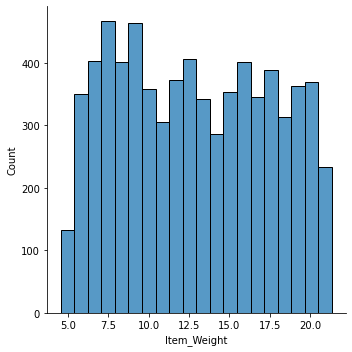

In [13]:
sns.displot(data['Item_Weight'])

In [14]:
df[df['Item_Identifier']=='DRA59']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1876,DRA59,8.27,Regular,0.127928,Soft Drinks,184.8924,OUT046,1997,Small,Tier 1,Supermarket Type1,4442.2176
3927,DRA59,8.27,Regular,0.128127,Soft Drinks,183.6924,OUT049,1999,Medium,Tier 1,Supermarket Type1,1295.6468
3962,DRA59,8.27,Regular,0.127821,Soft Drinks,185.9924,OUT013,1987,High,Tier 3,Supermarket Type1,555.2772
5609,DRA59,8.27,Regular,0.000000,Soft Drinks,183.2924,OUT017,2007,NaN,Tier 2,Supermarket Type1,2406.2012
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
6338,DRA59,8.27,Regular,0.128449,Soft Drinks,186.5924,OUT018,2009,Medium,Tier 3,Supermarket Type2,4442.2176
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924


Since the Item_Weight is same for all occurances of an Item_Identifier and the NaN is not accounted in the mean calculation on groupby, we can use the mean() to replace the missing values of Item_Weights


In [15]:
Item_Weight_for_MissingValues=df[['Item_Identifier','Item_Weight']].groupby(by='Item_Identifier').mean()
Item_Weight_for_MissingValues

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [16]:
df['Item_Weight'] = df['Item_Identifier'].apply(lambda x: Item_Weight_for_MissingValues.loc[x])

In [17]:
df[df['Item_Identifier']=='DRA59']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1876,DRA59,8.27,Regular,0.127928,Soft Drinks,184.8924,OUT046,1997,Small,Tier 1,Supermarket Type1,4442.2176
3927,DRA59,8.27,Regular,0.128127,Soft Drinks,183.6924,OUT049,1999,Medium,Tier 1,Supermarket Type1,1295.6468
3962,DRA59,8.27,Regular,0.127821,Soft Drinks,185.9924,OUT013,1987,High,Tier 3,Supermarket Type1,555.2772
5609,DRA59,8.27,Regular,0.000000,Soft Drinks,183.2924,OUT017,2007,NaN,Tier 2,Supermarket Type1,2406.2012
6057,DRA59,8.27,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112
6179,DRA59,8.27,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
6338,DRA59,8.27,Regular,0.128449,Soft Drinks,186.5924,OUT018,2009,Medium,Tier 3,Supermarket Type2,4442.2176
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924


In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are still 4 more null values in Item_Weight.

In [19]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [20]:
df[df['Item_Identifier']=='FDQ60']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [21]:
df[df['Item_Type']=='Frozen Foods']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250
51,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8477,FDC05,13.100,Regular,0.099343,Frozen Foods,198.1768,OUT017,2007,NaN,Tier 2,Supermarket Type1,1970.7680
8482,FDZ28,20.000,Regular,0.051702,Frozen Foods,125.8678,OUT018,2009,Medium,Tier 3,Supermarket Type2,763.0068
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560


Since there are only one possible Item_Weight data for each Item_Identifier and Item_Type is not helping, the next step would be to contact the business team of an SME to get the data. In this case let me check the test data for help.

I am choosing to reach out to the test data only because there is only one possible Item_Weight for each Item_Identifier.

In [22]:
df[df['Item_Weight'].isnull()]['Item_Identifier'].values

array(['FDN52', 'FDK57', 'FDE52', 'FDQ60'], dtype=object)

In [23]:
df_ts[df_ts['Item_Identifier'].isin(['FDN52', 'FDK57', 'FDE52', 'FDQ60'])].groupby(by='Item_Identifier').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Identifier,,,,
FDE52,10.395,0.025652,88.965686,2000.714286
FDK57,10.195,0.070380,120.256500,2000.375000
FDN52,9.395,0.142853,86.944800,2000.375000
FDQ60,6.195,0.109476,120.322300,1998.750000


In [24]:
item_Weights_testdata = pd.pivot_table(df_ts, index='Item_Identifier', values='Item_Weight').loc[df[df['Item_Weight'].isnull()]['Item_Identifier'].values]

In [25]:
df.loc[df['Item_Weight'].isnull(),'Item_Weight'] = df.loc[df['Item_Weight'].isnull()]['Item_Identifier'].apply(lambda x: item_Weights_testdata.loc[x])

In [26]:
df[df['Item_Identifier'].isin(['FDN52', 'FDK57', 'FDE52', 'FDQ60'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,9.395,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,10.195,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,10.395,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,6.195,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Now the Missing values in the Outlet_Size

In [28]:
df[df['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [29]:
df[df['Outlet_Identifier']=='OUT045']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Since all the values for Outlet_Size is Missing based on Outlet_Identifier, I need to take the next best variable that represents the Outlet well. That would be the outlet_Type.

In [30]:
df[df['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [31]:
df[df['Outlet_Type']=='Grocery Store']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

The Outlet_Type looks like a good candidate to use for filling the missing values in Outlet_Size. Ill use mode in this case since it a categorical variable.

In [32]:
from scipy.stats import mode

In [33]:
Outlet_Sizemodes = pd.pivot_table(df, index = 'Outlet_Type', values = 'Outlet_Size', aggfunc= lambda x: mode(x)[0])

In [34]:
Outlet_Sizemodes

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [35]:
indexes = np.where(df['Outlet_Size'].isnull())[0]

In [36]:
df.loc[indexes, 'Outlet_Size'] = df.loc[indexes,'Outlet_Type'].apply(lambda x: Outlet_Sizemodes.loc[x])

In [37]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
df[df['Outlet_Identifier']=='OUT045']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Small,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,Small,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,Small,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,Small,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Small,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232


Outliers

In [39]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/#:~:text=The%20Problem%20Statement&text=The%20data%20scientists%20at%20BigMart,product%20at%20a%20particular%20store.

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df[df['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


In [42]:
df.Item_Visibility.nunique()

7880

In [43]:
df[df['Item_Identifier']=='FDX07']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.380
1491,FDX07,19.2,Regular,0.022914,Fruits and Vegetables,181.195,OUT035,2004,Small,Tier 2,Supermarket Type1,2380.235
2459,FDX07,19.2,Regular,0.022965,Fruits and Vegetables,181.695,OUT045,2002,Small,Tier 2,Supermarket Type1,2563.330
3089,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,184.595,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.995
5906,FDX07,19.2,Regular,0.022954,Fruits and Vegetables,184.495,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.090
7735,FDX07,19.2,Regular,0.022808,Fruits and Vegetables,183.495,OUT027,1985,Medium,Tier 3,Supermarket Type3,4577.375


We can see that the Visibility of the Item is arount 0.229 in other places.

In [44]:
rows = np.where(df['Item_Visibility']==0)[0]

Ill consider only the Items with Item_Visibility > 0 so that the 0s in the data do not influence our mean.

In [45]:
visibility_means = pd.pivot_table(df[df['Item_Visibility']>0], index='Item_Identifier', values= 'Item_Visibility')
visibility_means

,Item_Visibility
Item_Identifier,
DRA12,0.047934
DRA24,0.048062
DRA59,0.153963
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.029116
NCZ41,0.064529
NCZ42,0.011305


In [46]:
df.loc[rows,'Item_Visibility'] = df.loc[rows, 'Item_Identifier'].apply(lambda x: visibility_means.loc[x])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


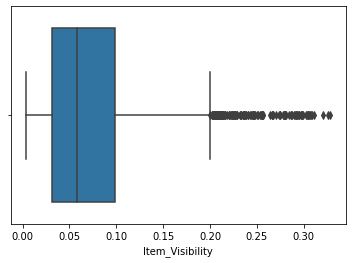

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


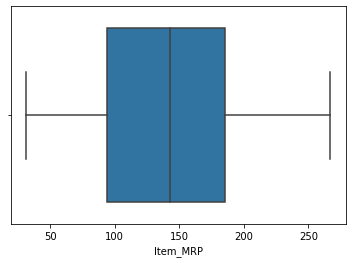

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


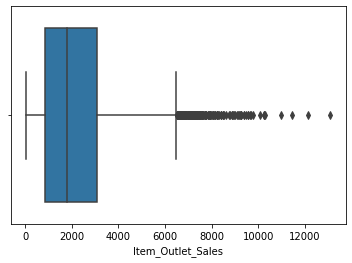

In [47]:
for col in ['Item_Visibility','Item_MRP','Item_Outlet_Sales']:
  sns.boxplot(df[col])
  plt.show()

Observations:
1. The Item_Visibility and Item_Outlet_Sales have outliers.

In [48]:
df[df['Item_Visibility']>0.21][['Outlet_Size','Outlet_Type']].value_counts()

Outlet_Size  Outlet_Type      
Small        Grocery Store        117
             Supermarket Type1      1
dtype: int64

Higher visibility for the Items seem to be mostly in Grocery Stores. Which I think is due to the smaller size of the store. The Items in a smaller places will have more visibility. So These numbers may be natural outliers. So I am leaving it as is.

In [49]:
df[df['Item_Outlet_Sales']>6000][['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 3                Supermarket Type3    137
Tier 2                Supermarket Type1     71
Tier 1                Supermarket Type1     43
Tier 3                Supermarket Type1     26
                      Supermarket Type2     12
dtype: int64

In [50]:
max(df['Item_Outlet_Sales'])

13086.9648

The Sales greater than 6000 seem to have occured only in Supermarkets. These may also be just natural outliers as it is usual for these kind of sales numbers in Supermarkets. So I am leaving it as is.

In [51]:
df[df['Item_Outlet_Sales']>6000]['Item_Type'].unique()

array(['Canned', 'Snack Foods', 'Health and Hygiene', 'Frozen Foods',
       'Starchy Foods', 'Others', 'Baking Goods', 'Household',
       'Fruits and Vegetables', 'Meat', 'Soft Drinks', 'Breads', 'Dairy',
       'Hard Drinks', 'Breakfast', 'Seafood'], dtype=object)

### Feature Engineering

In [52]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Age of the Outlet:

The age of the outlet can be an importand factor for the sales since the Outlets gain customers' trust through time. Ill calculate the age in 2013 since the data was collected in 2013.

In [53]:
df['Outlet_Age'] = df['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [54]:
df.Outlet_Age.value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Age, dtype: int64

The distribution looks good.

Grouping the Item_Identifier

In [55]:
df['Item_Identifier_Group'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC


In [56]:
df.Item_Identifier_Group.value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_Group, dtype: int64

In [57]:
df[df['Item_Identifier_Group']=='FD'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD
5,FDP36,10.395,Regular,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,26,FD


In [58]:
df[df['Item_Identifier_Group']=='DR'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
18,DRI11,8.26,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,28,DR
27,DRJ59,11.65,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312,26,DR
34,DRH01,17.50,Low Fat,0.097904,Soft Drinks,174.8738,OUT046,1997,Small,Tier 1,Supermarket Type1,2085.2856,16,DR
37,DRZ11,8.85,Regular,0.113124,Soft Drinks,122.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1609.9044,4,DR


In [59]:
df[df['Item_Identifier_Group']=='NC'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC
16,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,4,NC
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,9,NC
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080,6,NC
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,4,NC


From the above we an say that FD means Food, DR means Drinks and NC means Non-Consumables.

Also the NC items have fat content. Which does not make any sense. I will amrk those as not-edible.

In [60]:
indexes = np.where(df['Item_Identifier_Group']=='NC')[0]
indexes

array([   4,   16,   22, ..., 8504, 8516, 8520])

In [61]:
df.loc[indexes,'Item_Fat_Content'] = "Not Edible"

In [62]:
df.loc[indexes,'Item_Fat_Content'].value_counts()

Not Edible    1599
Name: Item_Fat_Content, dtype: int64

In [63]:
df.Item_Fat_Content.value_counts()

Low Fat       3612
Regular       2889
Not Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

We need to change LF and low fat to Low Fat and reg to Regular

In [64]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat',
                            'low fat':'Low Fat',
                            'reg':'Regular'})
df.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Not Edible    1599
Name: Item_Fat_Content, dtype: int64

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Not Edible,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC


Item_Type and Outlet_Establishment_Year can be dropped.

In [66]:
df.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Group
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,Regular,0.022911,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Not Edible,0.016164,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,NC


### Encoding

There are no binary variables. Hence Ill use get_dummies for encoding.

In [68]:
enc_df = pd.get_dummies(df.drop(['Item_Identifier'], axis=1), drop_first=True)
enc_df['Item_Identifier'] = df['Item_Identifier']
enc_df['Outlet_Identifier'] = df['Outlet_Identifier']
enc_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Not Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Group_FD,Item_Identifier_Group_NC,Item_Identifier,Outlet_Identifier
0,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,FDA15,OUT049
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,DRC01,OUT018
2,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,FDN15,OUT049
3,19.20,0.022911,182.0950,732.3800,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,FDX07,OUT010
4,8.93,0.016164,53.8614,994.7052,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,NCD19,OUT013


### Finding Random State

In [74]:
df_x=enc_df.drop(columns=["Item_Outlet_Sales", 'Item_Identifier','Outlet_Identifier'],axis=1)
y=enc_df[["Item_Outlet_Sales"]]

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
  

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :1.0


In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def get_r_state(model,x,y):
    max_r_score=0
    for r_state in range(1,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score=r2_score(y_test,y_pred)
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [ ]:
from sklearn.model_selection import cross_val_score
def model_eval(model,x,y):
    scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",scores.mean())
    print("standard deviation in r2 score for regressor: ",scores.std())
    print(scores)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=get_r_state(dtr,x_pca,y)

max r2 score corresponding to  42  is  0.26961618541574683


## HyperParameter Tunning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr=RandomForestRegressor()
parameters = {"n_estimators":[50,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [ ]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=get_r_state(rfr,x_pca,y)

max r2 score corresponding to  3  is  0.5980749262502933


In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 19}

In [ ]:
knr=KNeighborsRegressor(n_neighbors=8)
r_state=get_r_state(knr,x_pca,y)

max r2 score corresponding to  3  is  0.5856927289343581


In [78]:
from sklearn.svm import SVR

In [ ]:
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [80]:
svr=SVR(kernel="linear",C=10)
r_state=get_r_state(svr,x_pca,y)

In [ ]:
print("DECISION TREE REGRESSOR\n")
model_eval(dtr,x_pca,y)
print("\nRANDOM FOREST REGRESSOR\n")
model_eval(rfr,x_pca,y)
print("\nKNN REGRESSOR\n")
model_eval(knr,x_pca,y)
print("\nSVM REGRESSOR\n")
model_eval(svr,x_pca,y)


DECISION TREE REGRESSOR

Mean r2 score for regressor:  0.1442584150677041
standard deviation in r2 score for regressor:  0.04227045366471945
[0.158375   0.12901444 0.06938893 0.18438967 0.18012403]

RANDOM FOREST REGRESSOR

Mean r2 score for regressor:  0.5560851379997518
standard deviation in r2 score for regressor:  0.01766419762514116
[0.57470604 0.54536583 0.5266864  0.5680844  0.56558302]

KNN REGRESSOR

Mean r2 score for regressor:  0.5394986609153403
standard deviation in r2 score for regressor:  0.012618505839055208
[0.54706668 0.52057359 0.52963518 0.54471188 0.55550598]

SVM REGRESSOR

Mean r2 score for regressor:  0.5493645380866801
standard deviation in r2 score for regressor:  0.0033364872911481316
[0.55113812 0.5466275  0.54424595 0.55281067 0.55200044]


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y['Item_Outlet_Sales'],random_state = 3,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [92]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1117.75733033314
r2_score is:  0.5804318660238215


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y['Item_Outlet_Sales'],random_state = 3,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [94]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1094.0915422794483
r2_score is:  0.5980104490107486


## Saving the model

In [95]:
import joblib
joblib.dump(rfr,'./models/bigmart_model.obj')